# **CLUSTERING**

## Distancias

In [1]:
from scipy.spatial import distance_matrix
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("../datasets/movies/movies.csv", sep = ";")

In [3]:
data.head()

,user_id,star_wars,lord_of_the_rings,harry_potter
0,1,1.2,4.9,2.1
1,2,2.1,8.1,7.9
2,3,7.4,3.0,9.9
3,4,5.6,0.5,1.8
4,5,1.5,8.3,2.6


In [4]:
movies = data.columns.values.tolist()[1:]
movies

['star_wars', 'lord_of_the_rings', 'harry_potter']

In [5]:
# matriz de distancias con Manhattan

dd1 = distance_matrix(data[movies], data[movies], p =1)

# matriz de distancias euclineanas

dd2 = distance_matrix(data[movies], data[movies], p =2)

# matriz de distancias con minkosky

ddn = distance_matrix(data[movies], data[movies], p =10)

In [6]:
def dm_to_df(dd,col_name):
    import pandas as pd
    return pd.DataFrame(dd, index=col_name, columns= col_name)

In [7]:
dm_to_df(dd1, data["user_id"])

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9
6,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2
7,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2
8,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1
9,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9


In [8]:
dm_to_df(dd2, data["user_id"])

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.000000,6.685058,10.143471,6.229767,3.449638,4.742362,7.244998,5.047772,3.633180,0.412311
2,6.685058,0.000000,7.622336,10.354709,5.337602,4.634652,0.616441,3.618011,8.015610,6.578754
3,10.143471,7.622336,0.000000,8.666026,10.779147,6.004998,7.626270,10.010494,8.424369,9.770363
4,6.229767,10.354709,8.666026,0.000000,8.848164,6.476110,10.823123,9.958414,3.482815,5.890671
5,3.449638,5.337602,10.779147,8.848164,0.000000,6.113101,5.921993,2.167948,6.709694,3.612478
6,4.742362,4.634652,6.004998,6.476110,6.113101,0.000000,4.949747,5.987487,3.945884,4.431704
7,7.244998,0.616441,7.626270,10.823123,5.921993,4.949747,0.000000,4.153312,8.471718,7.137226
8,5.047772,3.618011,10.010494,9.958414,2.167948,5.987487,4.153312,0.000000,7.769170,5.107837
9,3.633180,8.015610,8.424369,3.482815,6.709694,3.945884,8.471718,7.769170,0.000000,3.293934


In [9]:
dm_to_df(ddn, data["user_id"])

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.000000,5.801514,7.875189,4.715803,3.400000,4.400003,6.400850,4.401025,3.200085,0.301025
2,5.801514,0.000000,5.582463,7.680689,5.300000,4.400005,0.600000,3.400010,6.435159,5.603800
3,7.875189,5.582463,0.000000,8.100007,7.408914,4.912532,5.689450,6.570254,6.820602,7.658364
4,4.715803,7.680689,8.100007,0.000000,7.801255,4.717102,7.873307,8.800205,3.000101,4.450759
5,3.400000,5.300000,7.408914,7.801255,0.000000,4.681464,5.900000,1.900310,6.600000,3.600000
6,4.400003,4.400005,4.912532,4.717102,4.681464,0.000000,4.500135,5.600019,3.401683,4.200000
7,6.400850,0.600000,5.689450,7.873307,5.900000,4.500135,0.000000,4.000001,6.595259,6.202035
8,4.401025,3.400010,6.570254,8.800205,1.900310,5.600019,4.000001,0.000000,7.600000,4.600288
9,3.200085,6.435159,6.820602,3.000101,6.600000,3.401683,6.595259,7.600000,0.000000,3.000014


In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d


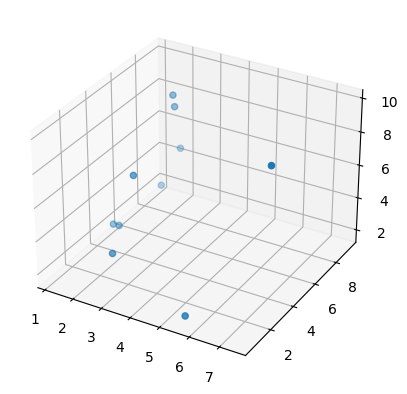

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection ="3d")
ax.scatter3D(xs=data["star_wars"], ys=data["lord_of_the_rings"], zs=data["harry_potter"])

### **Clustering Jerarquico**

Tienen como objetivo agrupar cluster para crear uno nuevo o bien separar algunos cluster a otros dos, para generar procesos o de aglomeración o división, con el fin de minimizar algun tipo de medición en comun, como distacias, entre cada uno de los elementos que forman parte del Clustering.

#### ***Aglomerativo***
Empiza el analisis con tantos grupos como individuos tenemos. A partir de esos clusters individuales, se empiezan a formar agrupaciones comunes hasta finalizar con un unico conglomerado

#### ***Disociativo***

Se inicia con todos los individuos en un solo cluster y se desagrega en varios clusters divididos



### Métodos de Enlace

##### Enlace simple

La distancia entre dos clusters es el mínimo de las distacias entre cualquier dos puntos del cluster 1 y el cluster 2.

Dos clusters con la distancia mínima entre ellos se combinan del siguiente modo:

$$d(C_m, C_n) = min(d(x_i, y_i))\ \forall x_i \in C_m, y_i \in C_n$$



##### Enlace completo

La distancia entre dos clusters es el máximo de las distancias cualquier dos puntos de un cluster A y un Cluster B.

La distancia minima entre estos dos cluster sera recalculada entonces como la distanacia maxima entre dichos dos puntos A y B:

$$d(C_m, C_n) = max(d(x_i, y_i))\ \forall x_i \in C_m, y_i \in C_n$$

##### Enlace Promedio

La distancia entre dos clusters es el promedio de la distancia entre cual quier dos o mas puntos del cluster A y el cluster B.

Dos clusters con la distancia minima entre ellos se combinan del siguiente modo:

$$d(C_m, C_n) = mean(d(x_i, y_i))\ \forall x_i \in C_m, y_i \in C_n$$

##### Enlace del centroide

La distancia entre dos clusters es la distancia entre el centroide (punto medio) del cluster 1 y el centroide del cluster 2.

Los dos clusters se combinan de la siguiente forma:

$$d(C_m, C_n) = d(\bar{C_m}, \bar{C_n})

##### Enlace de Ward

Un cluster que minimiza el incremento del error combinado, en la suma de los cuadrados de la varianza se une a un cluster ya existente para formar uno nuevo.

Los clusters minimizan la varianza dentro de los puntos del mismo y en el data set global:

$$min \sum_{i=1}^k \sum_{x_i\in C_i}{(x_i-C_j)^2}$$

El incremento más pequeño del término de error de la varianza prueba que los elementos unidos a los clusters son mas similares a dicho cluster que a otros ya existentes en otros clusters.



#### **Algoritmo para un Clustering Jerarquico**

* Empezamos con n observaciones y por lo tanto n clusters
* Encontramos la menor distancia en la matríz de distancias y unimos las dos observaciones en un nuevo cluster
* Recalculamos las distancias entre los clusters antiguos y el nuevo recien creado con alguno de los métodos de enlace anteriores
* Repetimos los pasos 2 y 3 hasta que solo quede un cluster con las N observaciones



##### Enlaces

Utilizaremos la matriz de distancia de Manhattan creadas anteriormente para el ejercicio:

In [12]:
df = dm_to_df(dd1, data["user_id"])
df

user_id,1,2,3,4,5,6,7,8,9,10
user_id,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9
6,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2
7,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2
8,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1
9,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9


La matriz Z (inicialmente vacia), almacenará cada uno de los puntos del DF que se van agrupando en clusters.

In [13]:
Z = []

EL valor de la distancia minima es el valor 0.7 que es la distancia entre el usuario 1 y el 10. Por lo tanto, vamos a agregar una columna 11 con las nuevas distancias. A la lista Z agregaremos un array con los ids de los puntos agrupados, la distancia, y el número de puntos agrupados.

In [14]:
df[11]=df[1]+df[10]
df.loc[11]=df.loc[1]+df.loc[10]
Z.append([1,10,0.7,2]) #ID1, ID2, Distancia, elementos_en_el_cluster
df 

user_id,1,2,3,4,5,6,7,8,9,10,11
user_id,,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7,0.7
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6,19.5
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2,31.1
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8,17.9
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9,8.1
6,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2,13.1
7,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2,20.7
8,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1,14.5
9,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9,10.5


Ahora, vamos a recalcular las distancias de toda la matriz, sin tener en cuenta la columna 1 y 10, a través de un bucle for.

In [15]:
for i in df.columns.values.tolist():
    df.loc[11][i] = min(df.loc[1][i],df.loc[10][i])
    df.loc[i][11] = min(df.loc[i][1], df.loc[i][10])
df

C:\Users\manuel.pacheco\AppData\Local\Temp\ipykernel_22096\3911793470.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[11][i] = min(df.loc[1][i],df.loc[10][i])
C:\Users\manuel.pacheco\AppData\Local\Temp\ipykernel_22096\3911793470.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[i][11] = min(df.loc[i][1], df.loc[i][10])


user_id,1,2,3,4,5,6,7,8,9,10,11
user_id,,,,,,,,,,,
1,0.0,9.9,15.9,9.1,4.2,6.9,10.5,7.4,5.6,0.7,0.7
2,9.9,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,9.6,19.5
3,15.9,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,15.2,31.1
4,9.1,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,8.8,17.9
5,4.2,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,3.9,8.1
6,6.9,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,6.2,13.1
7,10.5,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,10.2,20.7
8,7.4,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,7.1,14.5
9,5.6,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,4.9,10.5


Como ya tengo agrupados los elementos 1 y 10, procederé a eliminarlos del dataset para continuar iterando.

In [16]:
df = df.drop([1,10])
df = df.drop([1,10], axis=1)
df

user_id,2,3,4,5,6,7,8,9,11
user_id,,,,,,,,,
2,0.0,12.4,17.2,6.1,6.2,0.8,4.9,11.7,19.5
3,12.4,0.0,12.4,18.5,9.0,12.0,17.3,12.9,31.1
4,17.2,12.4,0.0,12.7,11.0,18.0,15.3,5.5,17.9
5,6.1,18.5,12.7,0.0,9.5,6.5,3.2,8.2,8.1
6,6.2,9.0,11.0,9.5,0.0,7.0,8.3,5.5,13.1
7,0.8,12.0,18.0,6.5,7.0,0.0,5.3,12.5,20.7
8,4.9,17.3,15.3,3.2,8.3,5.3,0.0,9.8,14.5
9,11.7,12.9,5.5,8.2,5.5,12.5,9.8,0.0,10.5
11,19.5,31.1,17.9,8.1,13.1,20.7,14.5,10.5,1.4


Ahora la distancia minima es 0.8 entre los usuarios 2 y 7. Pero definiremos dos variables para encapsular el codigo de forma generica.

In [17]:
x = 2
y = 7

n = 12

df[n]=df[x]+df[y]
df.loc[n]=df.loc[x]+df.loc[y]
Z.append([x,y,df.loc[x][y],2]) #ID1, ID2, Distancia, elementos_en_el_cluster

for i in df.columns.values.tolist():
    df.loc[n][i] = min(df.loc[x][i],df.loc[y][i])
    df.loc[i][n] = min(df.loc[i][x], df.loc[i][y])

df = df.drop([x,y])
df = df.drop([x,y], axis=1)
df

C:\Users\manuel.pacheco\AppData\Local\Temp\ipykernel_22096\2598787215.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[n][i] = min(df.loc[x][i],df.loc[y][i])
C:\Users\manuel.pacheco\AppData\Local\Temp\ipykernel_22096\2598787215.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[i][n] = min(df.loc[i][x], df.loc[i][y])


user_id,3,4,5,6,8,9,11,12
user_id,,,,,,,,
3,0.0,12.4,18.5,9.0,17.3,12.9,31.1,24.4
4,12.4,0.0,12.7,11.0,15.3,5.5,17.9,35.2
5,18.5,12.7,0.0,9.5,3.2,8.2,8.1,12.6
6,9.0,11.0,9.5,0.0,8.3,5.5,13.1,13.2
8,17.3,15.3,3.2,8.3,0.0,9.8,14.5,10.2
9,12.9,5.5,8.2,5.5,9.8,0.0,10.5,24.2
11,31.1,17.9,8.1,13.1,14.5,10.5,1.4,40.2
12,24.4,35.2,12.6,13.2,10.2,24.2,40.2,1.6


In [18]:
Z

[[1, 10, 0.7, 2], [2, 7, 0.7999999999999994, 2]]

In [19]:
x = 5
y = 8

n = 13

df[n]=df[x]+df[y]
df.loc[n]=df.loc[x]+df.loc[y]
Z.append([x,y,df.loc[x][y],2]) #ID1, ID2, Distancia, elementos_en_el_cluster

for i in df.columns.values.tolist():
    df.loc[n][i] = min(df.loc[x][i],df.loc[y][i])
    df.loc[i][n] = min(df.loc[i][x], df.loc[i][y])

df = df.drop([x,y])
df = df.drop([x,y], axis=1)
df

C:\Users\manuel.pacheco\AppData\Local\Temp\ipykernel_22096\1321280977.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[n][i] = min(df.loc[x][i],df.loc[y][i])
C:\Users\manuel.pacheco\AppData\Local\Temp\ipykernel_22096\1321280977.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[i][n] = min(df.loc[i][x], df.loc[i][y])


user_id,3,4,6,9,11,12,13
user_id,,,,,,,
3,0.0,12.4,9.0,12.9,31.1,24.4,35.8
4,12.4,0.0,11.0,5.5,17.9,35.2,28.0
6,9.0,11.0,0.0,5.5,13.1,13.2,17.8
9,12.9,5.5,5.5,0.0,10.5,24.2,18.0
11,31.1,17.9,13.1,10.5,1.4,40.2,22.6
12,24.4,35.2,13.2,24.2,40.2,1.6,22.8
13,35.8,28.0,17.8,18.0,22.6,22.8,6.4


In [20]:
x = 11
y = 13

n = 14

df[n]=df[x]+df[y]
df.loc[n]=df.loc[x]+df.loc[y]
Z.append([x,y,df.loc[x][y],2]) #ID1, ID2, Distancia, elementos_en_el_cluster

for i in df.columns.values.tolist():
    df.loc[n][i] = min(df.loc[x][i],df.loc[y][i])
    df.loc[i][n] = min(df.loc[i][x], df.loc[i][y])

df = df.drop([x,y])
df = df.drop([x,y], axis=1)
df

C:\Users\manuel.pacheco\AppData\Local\Temp\ipykernel_22096\4085168973.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[n][i] = min(df.loc[x][i],df.loc[y][i])
C:\Users\manuel.pacheco\AppData\Local\Temp\ipykernel_22096\4085168973.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[i][n] = min(df.loc[i][x], df.loc[i][y])


user_id,3,4,6,9,12,14
user_id,,,,,,
3,0.0,12.4,9.0,12.9,24.4,66.9
4,12.4,0.0,11.0,5.5,35.2,45.9
6,9.0,11.0,0.0,5.5,13.2,30.9
9,12.9,5.5,5.5,0.0,24.2,28.5
12,24.4,35.2,13.2,24.2,1.6,63.0
14,66.9,45.9,30.9,28.5,63.0,53.0


Al haber dos distancias iguales entre tres puntos, tendremos que agrupar los tres usuarios en un solo cluster:

In [21]:
x = 9
y = 12
z = 14

n = 15

df[n]=df[x]+df[y]
df.loc[n]=df.loc[x]+df.loc[y]
Z.append([x,y,df.loc[x][y],3]) #ID1, ID2, Distancia, elementos_en_el_cluster

for i in df.columns.values.tolist():
    df.loc[n][i] = min(df.loc[x][i],df.loc[y][i],df.loc[z][i])
    df.loc[i][n] = min(df.loc[i][x], df.loc[i][y], df.loc[i][z])

df = df.drop([x,y,z])
df = df.drop([x,y,z], axis=1)
df

C:\Users\manuel.pacheco\AppData\Local\Temp\ipykernel_22096\668986818.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[n][i] = min(df.loc[x][i],df.loc[y][i],df.loc[z][i])
C:\Users\manuel.pacheco\AppData\Local\Temp\ipykernel_22096\668986818.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[i][n] = min(df.loc[i][x], df.loc[i][y], df.loc[i][z])


user_id,3,4,6,15
user_id,,,,
3,0.0,12.4,9.0,37.3
4,12.4,0.0,11.0,40.7
6,9.0,11.0,0.0,18.7
15,37.3,40.7,18.7,50.0


In [22]:
x = 4
y = 6
z = 15

n = 16

df[n]=df[x]+df[y]
df.loc[n]=df.loc[x]+df.loc[y]
Z.append([x,y,df.loc[x][y],3]) #ID1, ID2, Distancia, elementos_en_el_cluster

for i in df.columns.values.tolist():
    df.loc[n][i] = min(df.loc[x][i],df.loc[y][i],df.loc[z][i])
    df.loc[i][n] = min(df.loc[i][x], df.loc[i][y], df.loc[i][z])

df = df.drop([x,y,z])
df = df.drop([x,y,z], axis=1)
df

C:\Users\manuel.pacheco\AppData\Local\Temp\ipykernel_22096\3326429711.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[n][i] = min(df.loc[x][i],df.loc[y][i],df.loc[z][i])
C:\Users\manuel.pacheco\AppData\Local\Temp\ipykernel_22096\3326429711.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[i][n] = min(df.loc[i][x], df.loc[i][y], df.loc[i][z])


user_id,3,16
user_id,,
3,0.0,21.4
16,21.4,22.0


In [23]:
x = 3
y = 16

n = 17

df[n]=df[x]+df[y]
df.loc[n]=df.loc[x]+df.loc[y]
Z.append([x,y,df.loc[x][y],2]) #ID1, ID2, Distancia, elementos_en_el_cluster

for i in df.columns.values.tolist():
    df.loc[n][i] = min(df.loc[x][i],df.loc[y][i])
    df.loc[i][n] = min(df.loc[i][x], df.loc[i][y])

df = df.drop([x,y])
df = df.drop([x,y], axis=1)
df

C:\Users\manuel.pacheco\AppData\Local\Temp\ipykernel_22096\2481675998.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[n][i] = min(df.loc[x][i],df.loc[y][i])
C:\Users\manuel.pacheco\AppData\Local\Temp\ipykernel_22096\2481675998.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[i][n] = min(df.loc[i][x], df.loc[i][y])


user_id,17
user_id,
17,64.8


In [24]:
Z

[[1, 10, 0.7, 2],
 [2, 7, 0.7999999999999994, 2],
 [5, 8, 3.2, 2],
 [11, 13, 22.6, 2],
 [9, 12, 24.2, 3],
 [4, 6, 11.0, 3],
 [3, 16, 21.4, 2]]

## Haciendo Clusterin jerárquico con herramientas de Python

In [25]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram,linkage

In [26]:
movies

['star_wars', 'lord_of_the_rings', 'harry_potter']

In [27]:
data[movies]

,star_wars,lord_of_the_rings,harry_potter
0,1.2,4.9,2.1
1,2.1,8.1,7.9
2,7.4,3.0,9.9
3,5.6,0.5,1.8
4,1.5,8.3,2.6
5,2.5,3.7,6.5
6,2.0,8.2,8.5
7,1.8,9.3,4.5
8,2.6,1.7,3.1
9,1.5,4.7,2.3


la funcíon linkage nos suministra los enlaces entre los individuos de una forma similar a la realizada manualmente anteriormente, con alguno de los métodos de enlace vistos previamente. Para este caso, usaremos el enlace de Ward:

In [28]:
Z = linkage(data[movies], "ward")
Z

array([[ 0.        ,  9.        ,  0.41231056,  2.        ],
       [ 1.        ,  6.        ,  0.6164414 ,  2.        ],
       [ 4.        ,  7.        ,  2.16794834,  2.        ],
       [ 3.        ,  8.        ,  3.48281495,  2.        ],
       [ 5.        , 10.        ,  5.2943366 ,  3.        ],
       [13.        , 14.        ,  6.59317829,  5.        ],
       [11.        , 12.        ,  6.66408283,  4.        ],
       [ 2.        , 15.        , 10.62355873,  6.        ],
       [16.        , 17.        , 12.8156935 , 10.        ]])

El array resultante arroja un resultado similar al objetino en el ejercicio que realizamos de manera manual anteriormete. Esto se puede evidencir en el valor de la distancia obtenido. Recordemos que los elementos del array son [id elemento1, id elemento2, distancia de elementos, cantidad de elementos que forman el cluster]

Ahora, graficaremos el esquema mediante un dendrograma:

<function matplotlib.pyplot.show(close=None, block=None)>

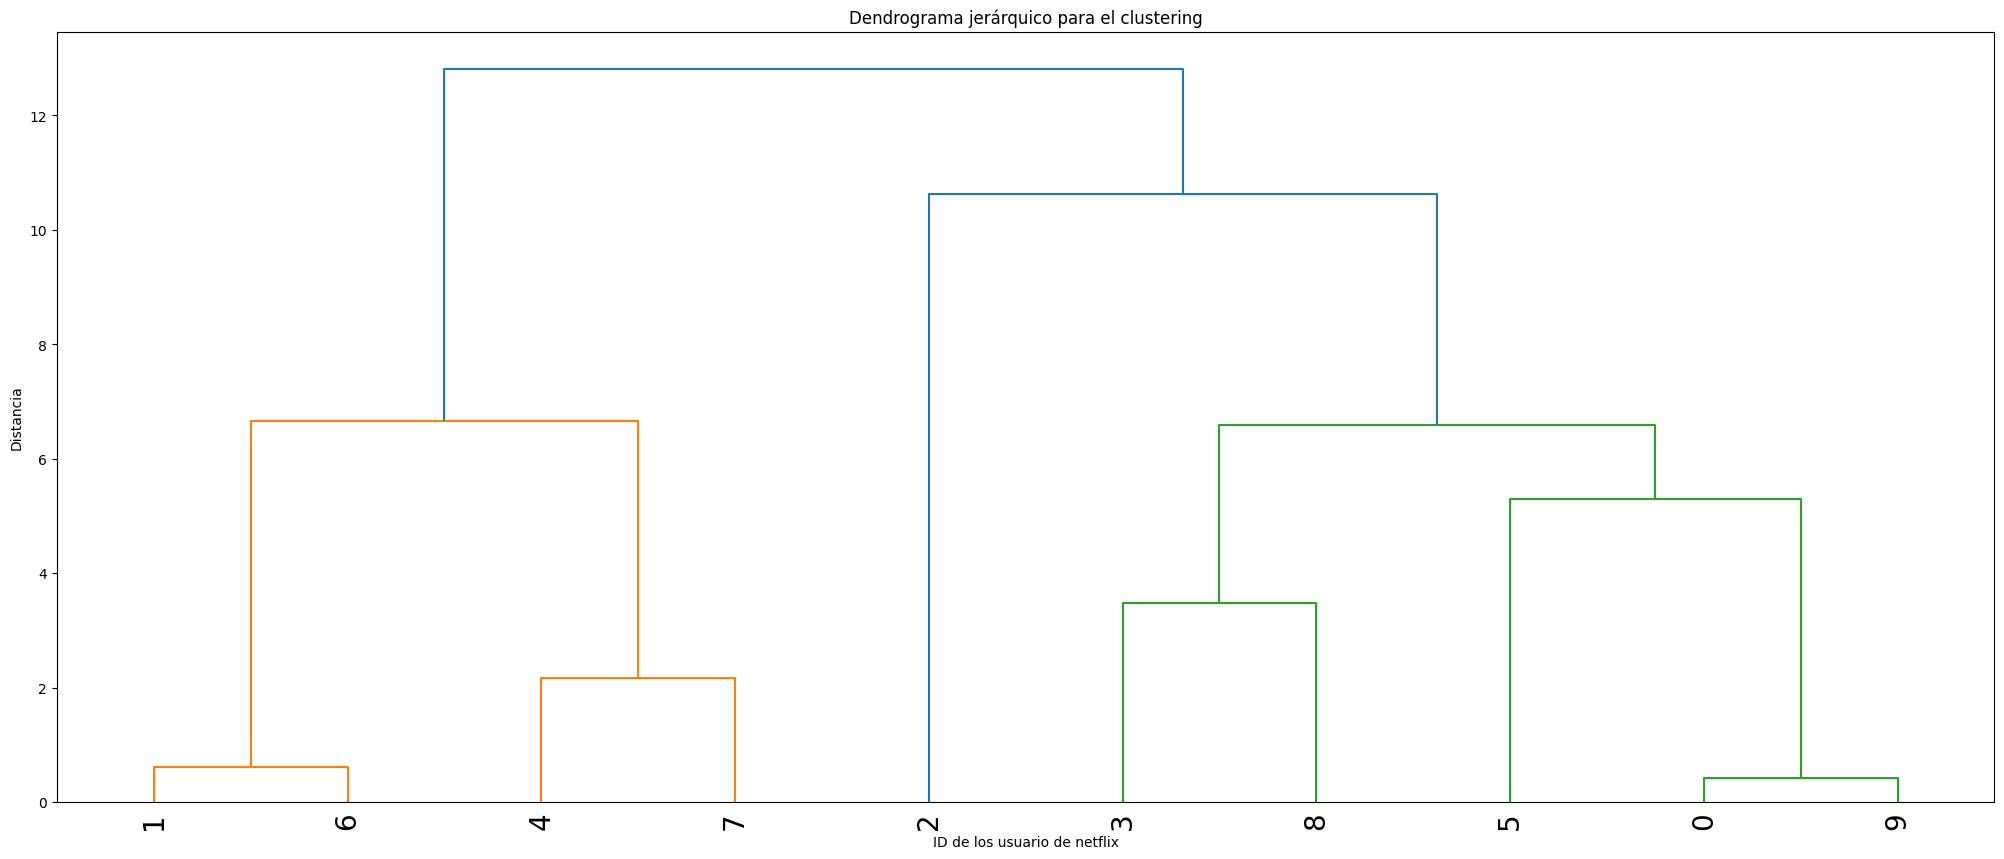

In [29]:
plt.figure(figsize=(25,10))
plt.title("Dendrograma jerárquico para el clustering")
plt.xlabel("ID de los usuario de netflix")
plt.ylabel("Distancia")
dendrogram(Z, leaf_rotation=90., leaf_font_size=20) #orientato = right para girar el eje
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

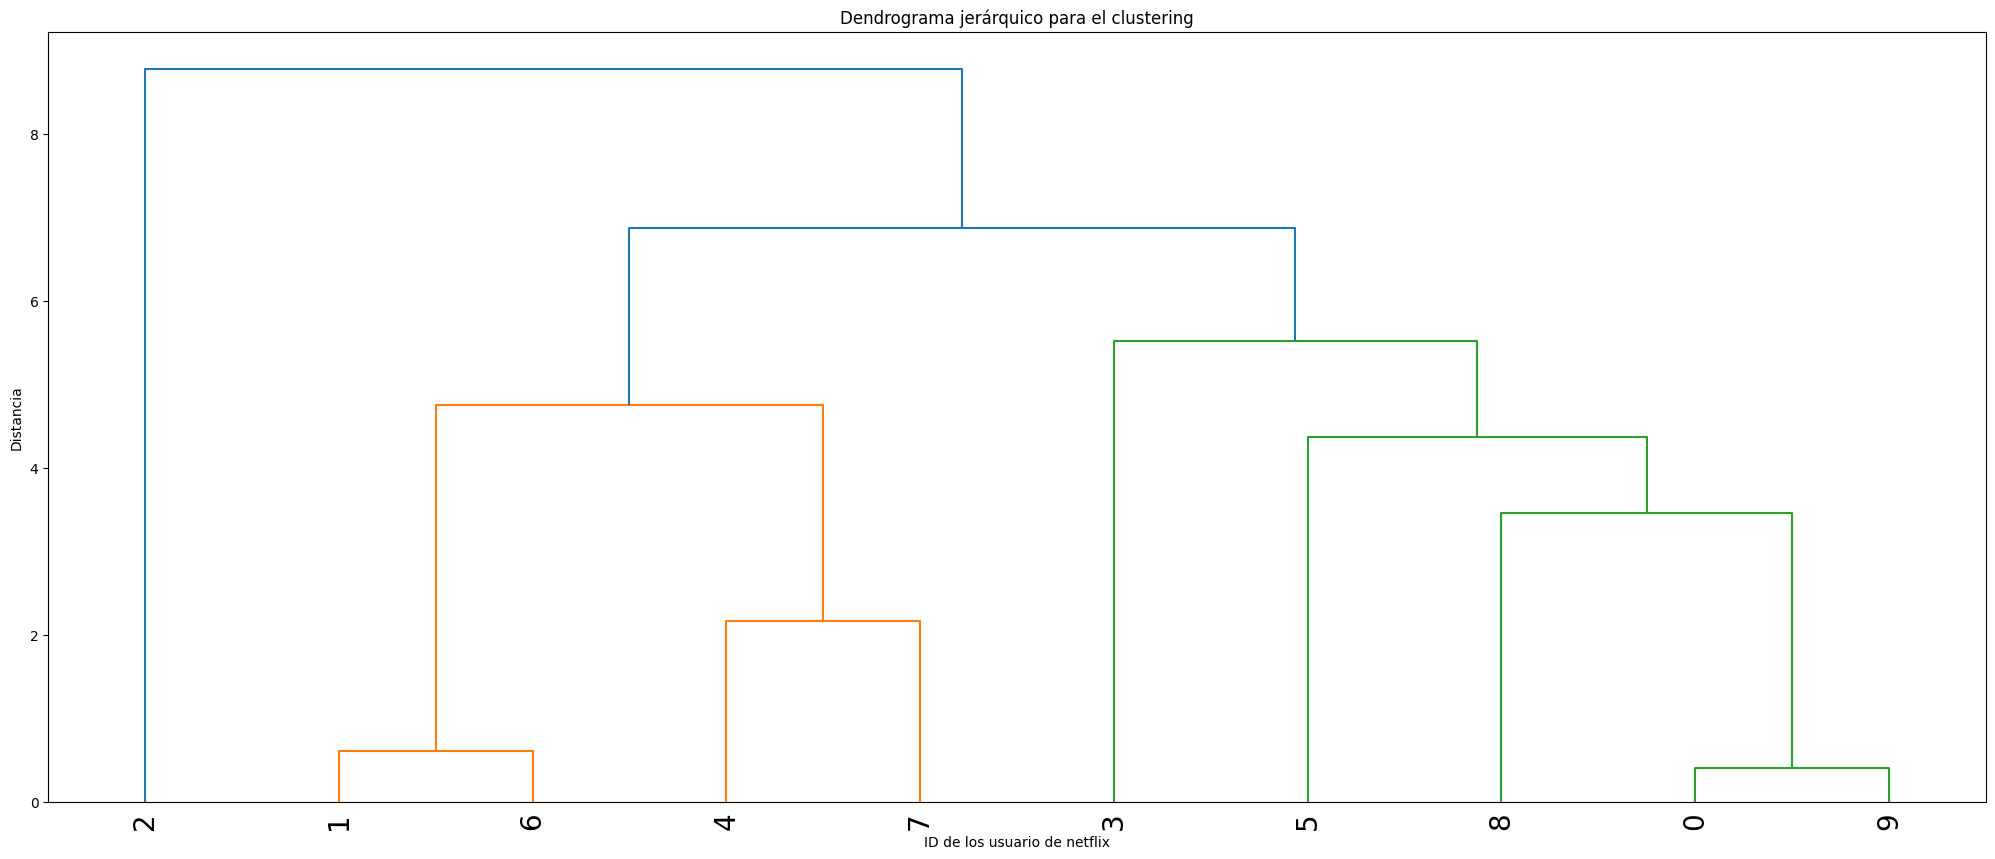

In [30]:
Z = linkage(data[movies], "average")

plt.figure(figsize=(25,10))
plt.title("Dendrograma jerárquico para el clustering")
plt.xlabel("ID de los usuario de netflix")
plt.ylabel("Distancia")
dendrogram(Z, leaf_rotation=90., leaf_font_size=20) #orientato = right para girar el eje
plt.show



### Clustering jerarquico con Python completo

* X: dataset(array de nxm)
* n: número de datos
* m: número de rasgos o variables
* Z: array de enlace del cluster con la información de las uniones
* k: número de clusters

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

(150, 2)


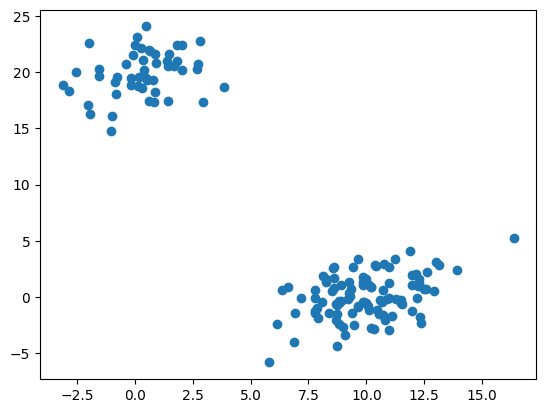

In [32]:
np.random.seed(4711)
a = np.random.multivariate_normal([10,0],[[3,1],[1,4]], size = [100,])
b = np.random.multivariate_normal([0,20],[[3,1],[1,4]], size = [50,])
X = np.concatenate((a,b))
print(X.shape)
plt.scatter(X[:,0], X[:,1])
plt.show()

Generamos la matriz de enlaces con el método de ward:

In [33]:
Z = linkage(X, "ward") 
Z

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       [1.70000000e+01, 7.30000000e+01, 7.13712071e-02, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 7.54313099e-02, 2.00000000e+00],
       [8.50000000e+01, 9.50000000e+01, 1.09277896e-01, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.10071548e-01, 2.00000000e+00],
       [9.00000000e+00, 6.60000000e+01, 1.13022407e-01, 2.00000000e+00],
       [1.50000000e+01, 6.90000000e+01, 1.14289714e-01, 2.00000000e+00],
       [6.30000000e+01, 9.80000000e+01, 1.21200766e-01, 2.00000000e+00],
       [1.07000000e+02, 1.15000000e+02, 1.21671017e-01, 2.00000000e+00],
       [6.50000000e+01, 7.40000000e+01, 1.24900190e-01, 2.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 1.40277358e-01, 2.00000000e+00],
       [6.20000000e+01, 1.52000000e+02, 1.72599535e

#### Coeficiente de correlación cofenetico

Compara las distancias dos a dos de nuestras muestras, con las que se han hallado en el clustering jerarquico. Entre mas cercano a 1 es mejor el clustering ya que preservara las distacias originales que hubiese entre las diferentes observaciones

In [34]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

In [35]:
c, coph_dist = cophenet(Z, pdist(X))
c

0.9800148387574268

El valor c arroja un 98% de conservación de las distancias originales comparada con los clusters generados

In [39]:
Z[0]

array([5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00])

Cada uno de los niveles del array generado puede interpretarse de la siguiente manera:

* los dos primeros elementos son los puntos que fueron tenidos en cuenta para ser unidos
* el tercer elemento es la distancia correspondiente entre cada uno de los elementos anteriores
* el cuarto indica el numero de elementos que se añadieron a un cluster

In [40]:
Z[:20]

array([[5.20000000e+01, 5.30000000e+01, 4.15105485e-02, 2.00000000e+00],
       [1.40000000e+01, 7.90000000e+01, 5.91375926e-02, 2.00000000e+00],
       [3.30000000e+01, 6.80000000e+01, 7.10677929e-02, 2.00000000e+00],
       [1.70000000e+01, 7.30000000e+01, 7.13712071e-02, 2.00000000e+00],
       [1.00000000e+00, 8.00000000e+00, 7.54313099e-02, 2.00000000e+00],
       [8.50000000e+01, 9.50000000e+01, 1.09277896e-01, 2.00000000e+00],
       [1.08000000e+02, 1.31000000e+02, 1.10071548e-01, 2.00000000e+00],
       [9.00000000e+00, 6.60000000e+01, 1.13022407e-01, 2.00000000e+00],
       [1.50000000e+01, 6.90000000e+01, 1.14289714e-01, 2.00000000e+00],
       [6.30000000e+01, 9.80000000e+01, 1.21200766e-01, 2.00000000e+00],
       [1.07000000e+02, 1.15000000e+02, 1.21671017e-01, 2.00000000e+00],
       [6.50000000e+01, 7.40000000e+01, 1.24900190e-01, 2.00000000e+00],
       [5.80000000e+01, 6.10000000e+01, 1.40277358e-01, 2.00000000e+00],
       [6.20000000e+01, 1.52000000e+02, 1.72599535e

Para identificar los culsters que ha unido el algoritmo con algun culster ya generado previamente, podemos utilizar la siguiente expresión:

In [46]:
print(Z[152-len(X)]) # cluster 152
print(Z[158-len(X)]) # cluster 158

[33.         68.          0.07106779  2.        ]
[15.         69.          0.11428971  2.        ]


Esto nos indicaria que los clusters agrupados serian el $(33, 68, 62)$, y si validamos los tres puntos, podremos identificar, si son similares.

In [42]:
X[[33,62,68]]

array([[ 9.83913054, -0.48729797],
       [ 9.97792822, -0.56383202],
       [ 9.8934927 , -0.44152257]])

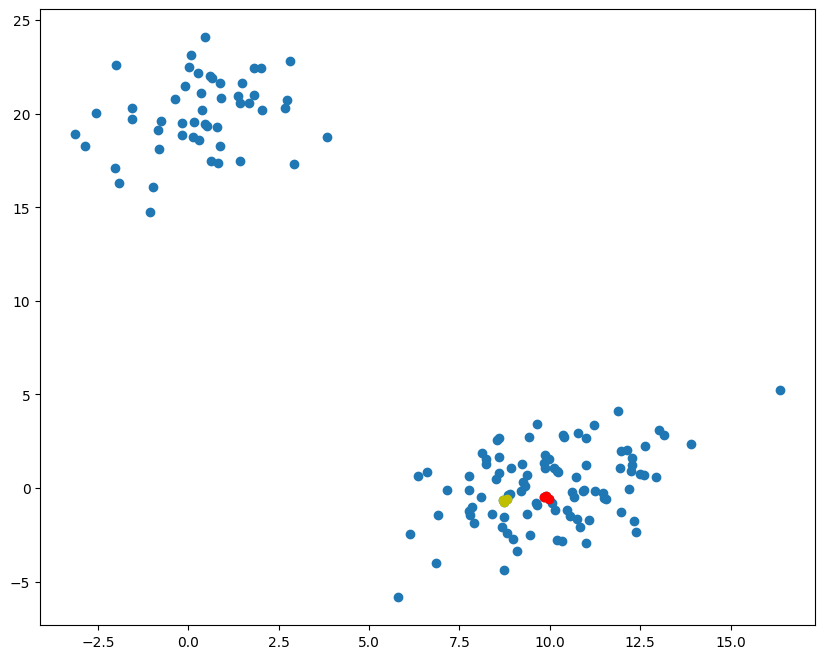

In [47]:
indices = [33,62,68]
indices2 = [15,69, 41]
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1]) #pintar todos los puntos
plt.scatter(X[indices,0], X[indices,1], c='r')
plt.scatter(X[indices2,0], X[indices2,1], c='y')
plt.show()

#### Dendrograma

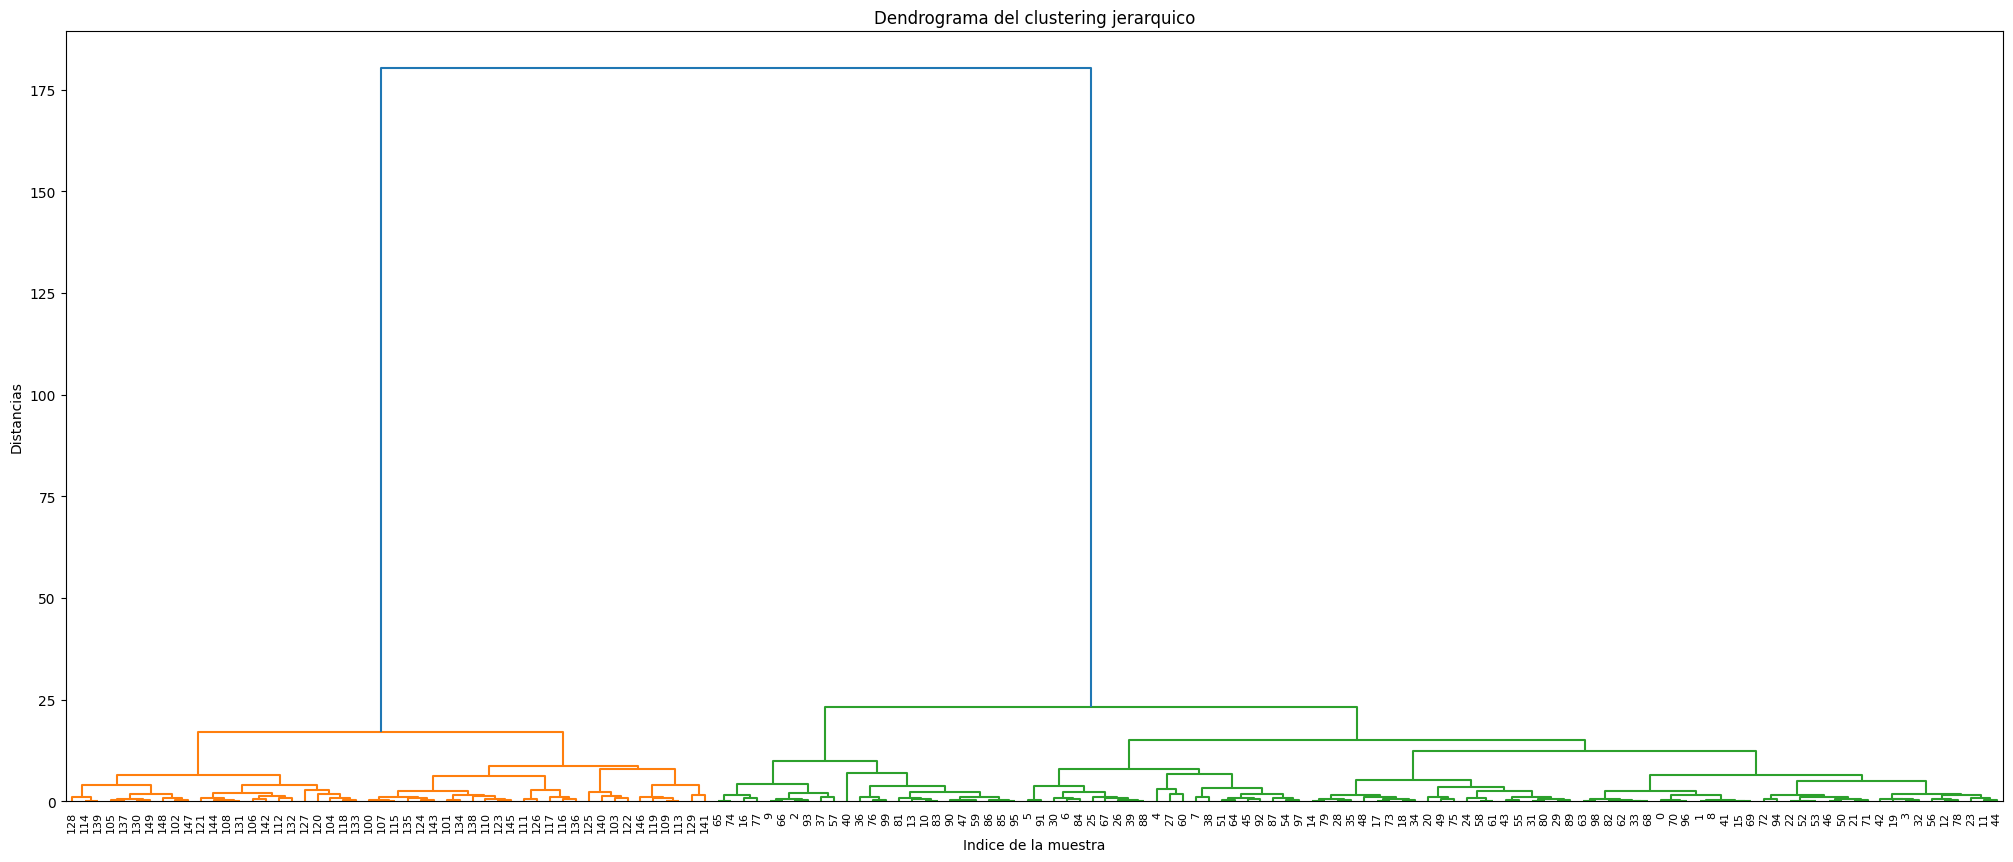

In [37]:
plt.figure(figsize=(25,10))
plt.title("Dendrograma del clustering jerarquico")
plt.xlabel("Indice de la muestra")
plt.ylabel("Distancias")
dendrogram(Z, leaf_rotation=90, leaf_font_size=8.0, color_threshold=0.7*180)
plt.show()

### Truncar el dendrograma

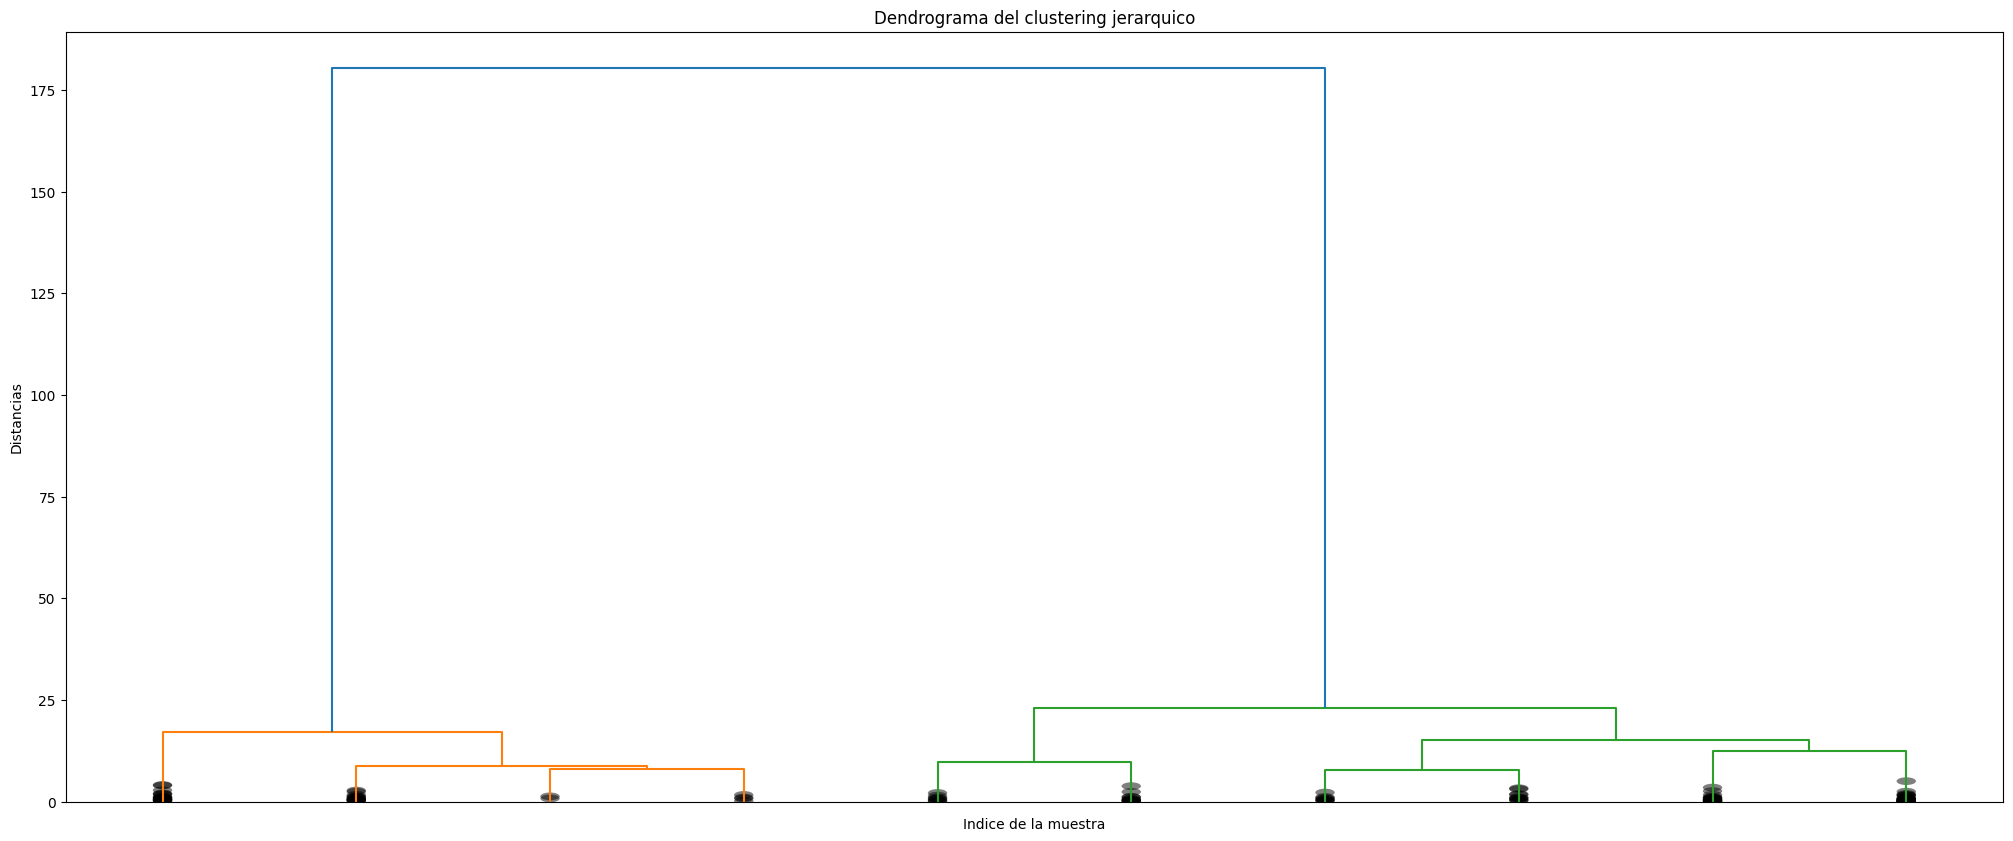

In [52]:
plt.figure(figsize=(25,10))
plt.title("Dendrograma del clustering jerarquico")
plt.xlabel("Indice de la muestra")
plt.ylabel("Distancias")
dendrogram(Z, leaf_rotation=90, leaf_font_size=14.0, color_threshold=0.7*180, truncate_mode="lastp", p = 10, show_leaf_counts=False, show_contracted=True)
plt.show()

### Dendrograma personalizado

In [72]:
def dendrogram_tune(*args, **kwargs):
    
    max_d=kwargs.pop("max_d", None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)
    
    ddata = dendrogram(*args,**kwargs)
        
    if not kwargs.get('no_plot', False):
        plt.title("Clustering jerárquico con Dendrograma truncado")
        plt.xlabel("Índice del Dataset (o tamaño del cluster)")
        plt.ylabel("Distancia")
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y>annotate_above:
                plt.plot(x,y,'o',c=c)
                plt.annotate('%.3g'%y, (x,y), xytext=(0,-5),
                            textcoords="offset points", va="top", ha="center")
                
    if max_d:
        plt.axhline(y=max_d, c='k')
        
    return ddata


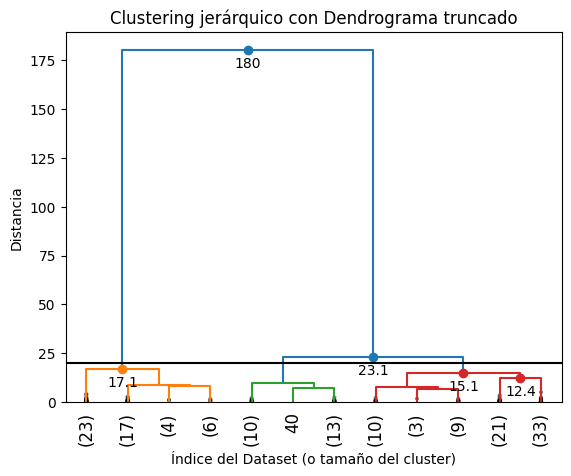

In [73]:
dendrogram_tune(Z, truncate_mode='lastp', p=12, leaf_rotation=90., leaf_font_size=12., show_contracted=True, annotate_above = 10, max_d=20)
plt.show(dendrogram)

### Corte automático del dendrograma

$$ inconsistencia = (h_i - avg(h_j))/std(h_j)$$

para h: altura

In [65]:
from scipy.cluster.hierarchy import inconsistent

In [67]:
depth = 5
incons = inconsistent(Z, depth)
incons[-10:]

array([[ 1.80874989,  2.17061644, 10.        ,  2.44276733],
       [ 2.31731998,  2.19649179, 16.        ,  2.52742372],
       [ 2.24511599,  2.44225327,  9.        ,  2.37659088],
       [ 2.30462321,  2.44191287, 21.        ,  2.6387508 ],
       [ 2.20673283,  2.68378067, 17.        ,  2.84581581],
       [ 1.95309037,  2.58100378, 29.        ,  4.05821033],
       [ 3.46173275,  3.53735716, 28.        ,  3.29443647],
       [ 3.15857131,  3.54836284, 28.        ,  3.93327935],
       [ 4.90210137,  5.10301603, 28.        ,  3.57041559],
       [12.12200256, 32.15467931, 30.        ,  5.22936105]])

### Método del codo

[180.27043021  23.12198936  17.11527362  15.11533118  12.42734657
   9.84427829   8.74822275   8.04935282   7.86878542   7.11106083]


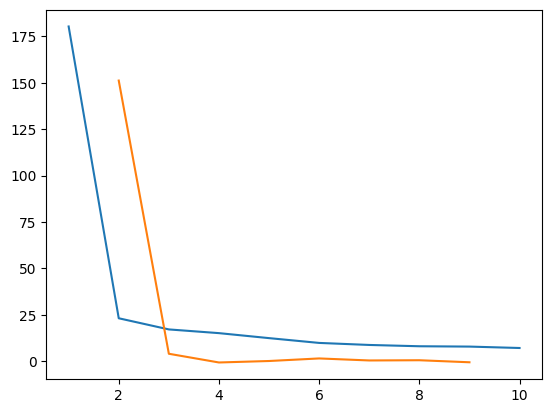

el número optimo de clusters es 2


In [71]:
last = Z[-10:,2]
last_rev = last[::-1]
print(last_rev)
idx = np.arange(1, len(last)+1)
plt.plot(idx, last_rev)

aceleraciones = np.diff(last, 2)
aceleraciones_rev = aceleraciones[::-1]
plt.plot(idx[:-2]+1, aceleraciones_rev)
plt.show()

k = aceleraciones_rev.argmax()+2
print(f'el número optimo de clusters es {k}')

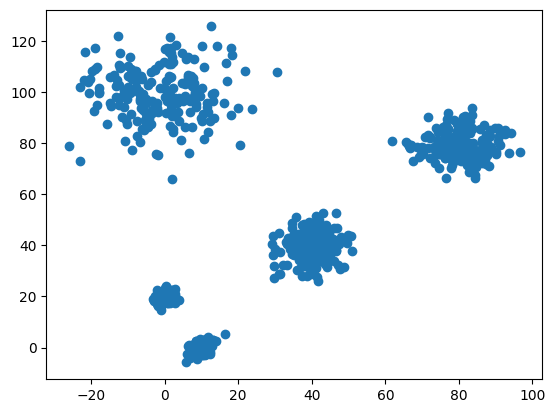

In [74]:
c = np.random.multivariate_normal([40,40],[[20,1],[1,30]], size=[200,])
d = np.random.multivariate_normal([80,80],[[30,1],[1,30]], size=[200,])
e = np.random.multivariate_normal([0,100],[[100,1],[1,100]], size=[200,])
X2 = np.concatenate((X,c,d,e),)
plt.scatter(X2[:,0], X2[:,1])
plt.show()

In [75]:
Z2 = linkage(X2,"ward")

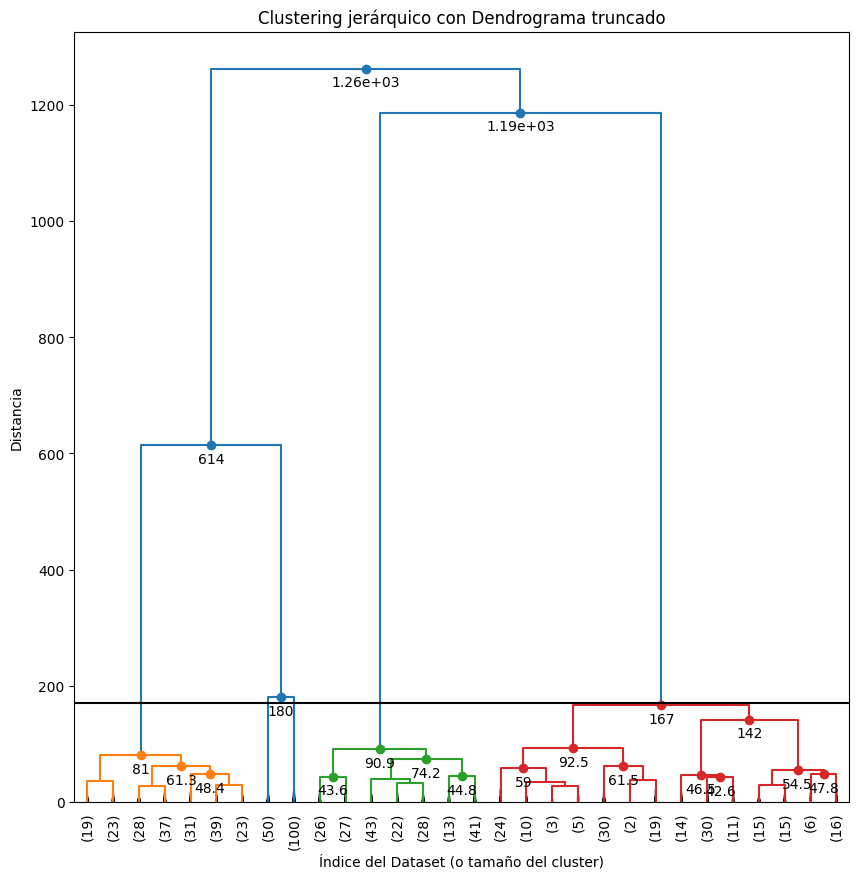

In [76]:
plt.figure(figsize=(10,10))
dendrogram_tune(
    Z2,
    truncate_mode="lastp",
    p=30,
    leaf_rotation=90.,
    leaf_font_size=10.,
    show_contracted=True,
    annotate_above = 40,
    max_d = 170
)

plt.show()

[1262.52130994 1186.7588235   614.06504667  180.27043021  166.66434658
  141.92437181   92.54599212   90.91214341   80.96733501   74.17015312]


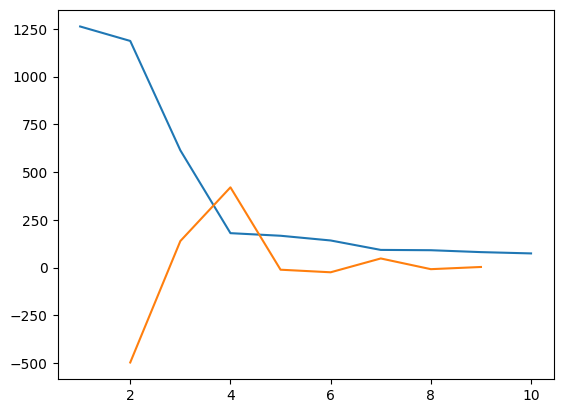

El número óptimo de cluster es 4


In [77]:
last = Z2[-10:,2]
last_rev = last[::-1]
print(last_rev)
idx = np.arange(1, len(last)+1)
plt.plot(idx, last_rev)

acc = np.diff(last,2)
acc_rev = acc[::-1]
plt.plot(idx[:-2]+1, acc_rev)
plt.show()
k = acc_rev.argmax() +2
print("El número óptimo de cluster es %s"%str(k))

In [78]:
print(inconsistent(Z2, 5)[-10:])

[[ 13.99221995  15.56655759  30.           3.8658472 ]
 [ 16.73940735  18.56390061  30.           3.45982932]
 [ 19.05945013  20.53210626  31.           3.49952861]
 [ 19.25573887  20.8265769   29.           3.51907342]
 [ 21.36116189  26.77659523  30.           4.50255938]
 [ 36.58100874  37.08602393  31.           3.50761079]
 [ 12.12200256  32.15467931  30.           5.22936105]
 [ 42.61369802 111.38576865  31.           5.13038026]
 [ 81.75198678 208.31582073  31.           5.30447871]
 [147.25602023 307.95700562  31.           3.62149673]]


### Recuperar los clusters y sus elementos

In [79]:
from scipy.cluster.hierarchy import fcluster

In [80]:
max_d = 20
clusters = fcluster(Z, max_d, criterion="distance")
clusters

array([3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3,
       3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [81]:
k = 3
clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3,
       3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

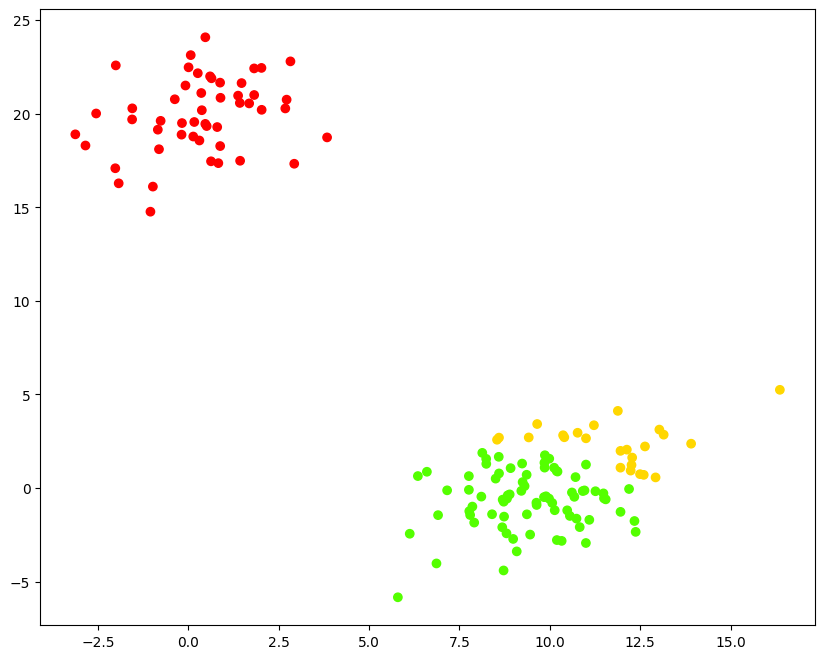

In [82]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c = clusters,  cmap='prism')
plt.show()

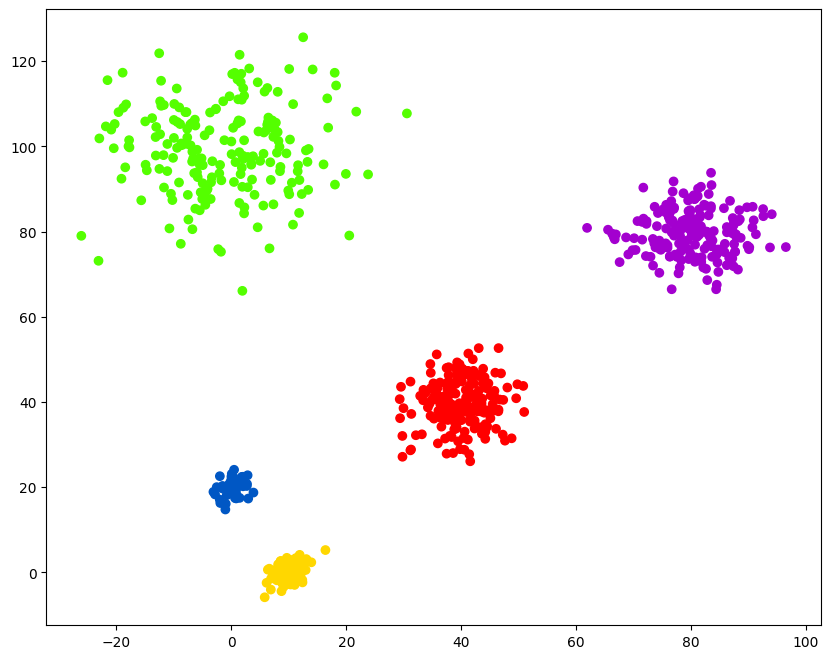

In [85]:
max_d = 170
clusters = fcluster(Z2, max_d, criterion="distance")
clusters

plt.figure(figsize=(10,8))
plt.scatter(X2[:,0], X2[:,1], c = clusters,  cmap='prism')
plt.show()